In [88]:
# /mnt/c/Users/Student/Desktop/Project$ code Alz_Classification/


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow_hub as hub



In [91]:


dataset = tf.keras.utils.image_dataset_from_directory(  
    "Alz_Datasets/Alz2/Axial/",
    shuffle = True,
    image_size = (256,170)
)

Found 5154 files belonging to 3 classes.


In [92]:
batch_size = 32
image_height = 256
image_width = 170


In [93]:

train_dataset = tf.keras.utils.image_dataset_from_directory(
    "Alz_Datasets/Alz2/Axial/",
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (image_height,image_width),
    batch_size = (batch_size)
)


Found 5154 files belonging to 3 classes.
Using 4124 files for training.


In [94]:

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    "Alz_Datasets/Alz2/Axial/",
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (image_height,image_width),
    batch_size = (batch_size)
)


Found 5154 files belonging to 3 classes.
Using 1030 files for validation.


In [77]:
class_names = train_dataset.class_names
print(class_names)

['AD', 'CI', 'CN']


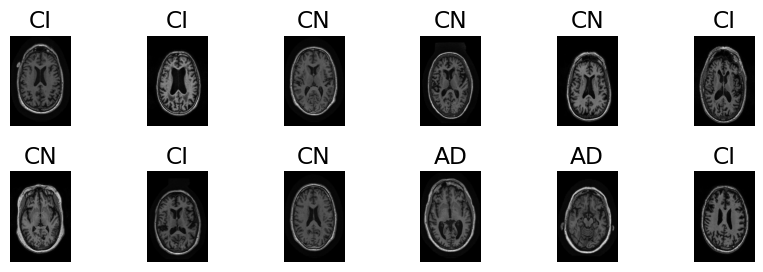

In [78]:

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()


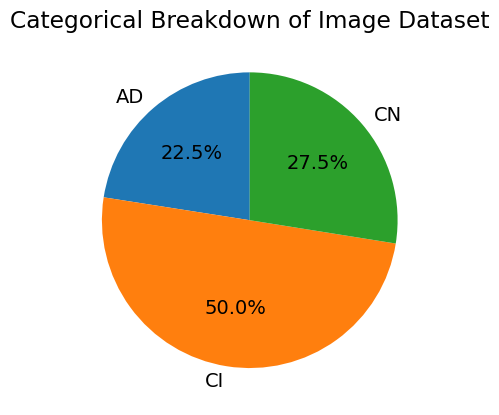

In [79]:

class_counts = [0] * len(class_names)

for _, labels in train_dataset:
    for label in labels.numpy():
        class_counts[label] += 1


plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=90)
plt.title('Categorical Breakdown of Image Dataset')
plt.show()

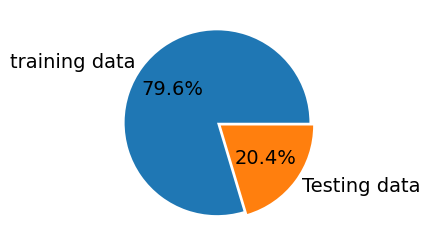

In [80]:
plt.figure(figsize=(3,3))
plt.pie(
    [len(train_dataset), len(validation_dataset)],
    labels=['training data','Testing data'],
    autopct='%.1f%%', explode=(0.05,0),
);

In [81]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 256, 170, 3)
(32,)


In [82]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [83]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 3

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [84]:
model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs= 10
)


Epoch 1/5


129/129 [==============================] - 27s 203ms/step - loss: 0.9707 - accuracy: 0.5318 - val_loss: 0.8330 - val_accuracy: 0.5971
Epoch 2/5
129/129 [==============================] - 24s 185ms/step - loss: 0.7178 - accuracy: 0.7127 - val_loss: 0.5908 - val_accuracy: 0.7544
Epoch 3/5
129/129 [==============================] - 24s 184ms/step - loss: 0.4753 - accuracy: 0.8252 - val_loss: 0.3669 - val_accuracy: 0.8689
Epoch 4/5
129/129 [==============================] - 24s 186ms/step - loss: 0.2853 - accuracy: 0.9069 - val_loss: 0.2270 - val_accuracy: 0.9291
Epoch 5/5
129/129 [==============================] - 24s 186ms/step - loss: 0.1592 - accuracy: 0.9564 - val_loss: 0.1337 - val_accuracy: 0.9650


In [85]:
model.save("model.keras")

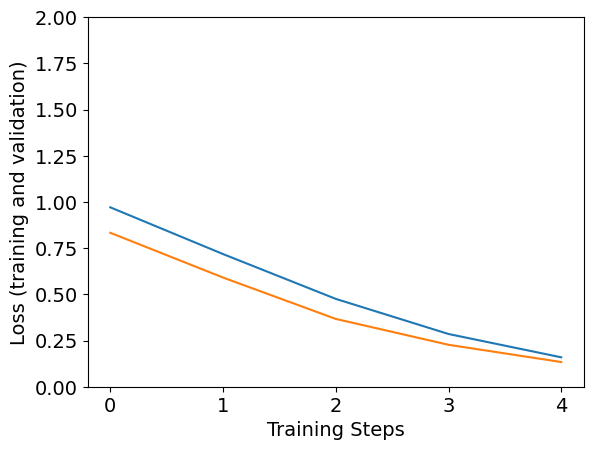

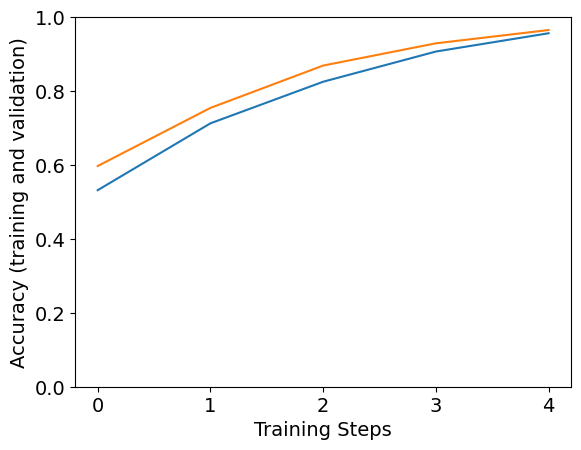

In [86]:
train_size = len(train_dataset)
valid_size = len(validation_dataset)
BATCH_SIZE = 32
steps_per_epoch = train_size // BATCH_SIZE
validation_steps = valid_size // BATCH_SIZE


hist = model.history.history


plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])